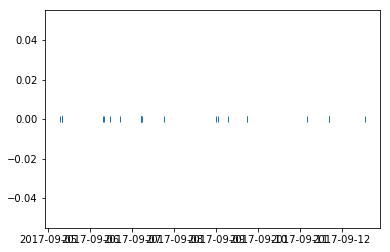

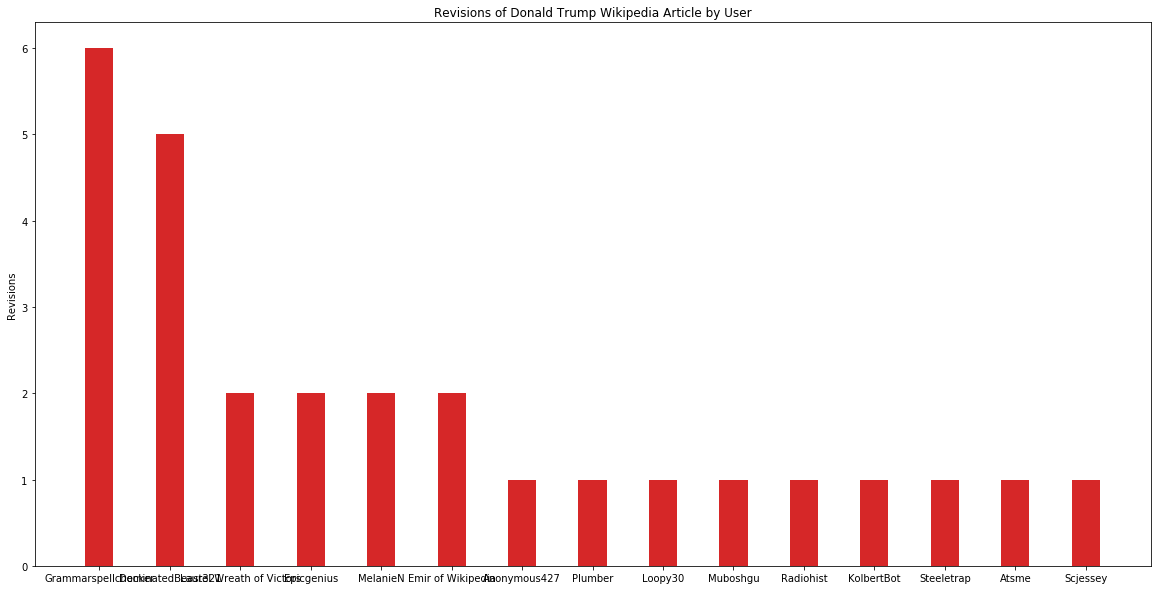

In [2]:
"""
Program that gets the revision for a page by user for a certain time interval
"""

import time
import datetime as dt
import mwapi
import operator
import numpy as np
import dateutil.parser as dup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

# Information specifying article and time interval to look at
article_title = 'Donald Trump'

"""
TODO: Create a way to restrict the time interval using these values.
days = 1
weeks = 0
months = 0
years = 0
"""

today = dt.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%dT%H:%M:%SZ')

action = 'query'
prop = 'revisions'
rv_prop = 'timestamp|user'
rv_limit = 'max'
rv_start = today
rv_end = '2017-09-05T00:00:00Z'

# Connect to Wikipedia
session = mwapi.Session('https://en.wikipedia.org', user_agent='cbouwense')

# Query Wikipedia for revisions on the supplied article
# The result is stored into the dictionary "rev_dict"
rev_dict = session.get(action=action,
                       prop=prop,
                       rvprop=rv_prop,
                       titles=article_title,
                       rvlimit=rv_limit,
                       rvstart=today,
                       rvend=rv_end)
revisions_by_user = {}

# Find page_id for selected article
for keys in rev_dict['query']['pages'].keys():
    page_id = keys

# Go through the timestamps for each revision made.
# If the timestamp is already a key in our dictionary, increment that key value by 1.
# Else, create a new key for that year in our dictionary and set it to 1
revs = []
for props in rev_dict['query']['pages'][str(page_id)]['revisions']:
    
    if (props['user'] not in revisions_by_user):
        revisions_by_user[props['user']] = 1
    else:
        revisions_by_user[props['user']] += 1

    timestamp = dup.parse(props['timestamp'])
    revs.append(timestamp)

# List of tuples of revisions made by user for page
sorted_user_revisions = sorted(revisions_by_user.items(), key=operator.itemgetter(1))[::-1]

plt.plot(revs, len(revs) * [0], '|')
plt.show()

# Check if there is a section named "continue".
# If there is, that means the query did not get all the data
# because of the per-user query limits.
while 'continue' in rev_dict:
    continue_val = rev_dict['continue']['rvcontinue']
    rev_dict = session.get(action=action,
                           prop=prop,
                           rvprop=rv_prop,
                           titles=article_title,
                           rvlimit=rv_limit,
                           rvstart=today,
                           rvend=re_end)

# Graph the revisions by user
ind = np.arange(len(sorted_user_revisions))    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

users = []
user_revs = []
for item in sorted_user_revisions:
    users.append(item[0])
    user_revs.append(item[1])

# Manipulate the width and height of the overall picture
plt.figure(figsize=(20, 10))
plt.bar(ind, user_revs, width, color='#d62728', linewidth=10)

plt.ylabel('Revisions')
plt.title('Revisions of %s Wikipedia Article by User' % article_title)
plt.xticks(ind, users)

plt.show()